In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
import warnings 
import itertools
warnings.filterwarnings('ignore')

In [80]:
t = pd.read_json('train.json')

In [81]:
t.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [82]:
testing = pd.read_json('test.json')

In [83]:
testing.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",40.7109,7143442,-73.9571,0b9d5db96db8472d7aeb67c67338c4d2,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r
100000,2.0,2,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12 05:24:17,"~Take a stroll in Central Park, enjoy the ente...","Midtown West, 8th Ave","[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.7650,6860601,-73.9845,b5eda0eb31b042ce2124fd9e9fcfce2f,[https://photos.renthop.com/2/6860601_c96164d8...,4900,260 West 54th Street


# Remove outlier

In [84]:
t = t[t['price'] <= np.percentile(t['price'], 99)]
t = t[t['price'] >= np.percentile(t['price'],1)]

In [85]:
t = t[t['latitude'] <= np.percentile(t['latitude'], 99)]
t = t[t['latitude'] >= np.percentile(t['latitude'],1)]

In [86]:
t = t[t['longitude'] <= np.percentile(t['longitude'], 99)]
t = t[t['longitude'] >= np.percentile(t['longitude'],1)]

In [87]:
def outputCSV(predLabel):
    labels2idx = {'high': 0, 'low': 1, 'medium': 2}
    sub = pd.DataFrame()
    sub["listing_id"] = testing["listing_id"]
    for label in ["high", "medium", "low"]:
        sub[label] = predLable[:, labels2idx[label]]
    sub.to_csv("submission_rf.csv", index=False)

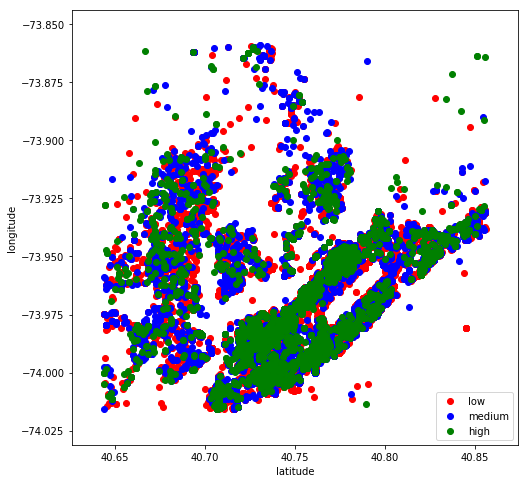

In [88]:
colors = itertools.cycle(["r", "b", "g"])
fig = plt.figure(figsize=(8,8))
for level in ['low', 'medium','high']:
    data = t[t['interest_level'] == level]
    lat = data['latitude']
    lon = data['longitude']
    plt.scatter(lat, lon, color=next(colors), label = level)
plt.legend()
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

# Feature selection

In [89]:
#simple feature 

In [90]:
featureSelect = ['bathrooms','bedrooms','latitude','longitude','price']
X_pred = testing[featureSelect]
X = t[featureSelect]
y = t['interest_level']

In [92]:
treeModel.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
y_pred = treeModel.predict_proba(X)

log_loss(y,y_pred)

0.6986680485025321

In [94]:
predLable = treeModel.predict_proba(X_pred)


In [95]:
outputCSV(predLable)

Random Forest log loss: 0.73383

# Tune Parameter

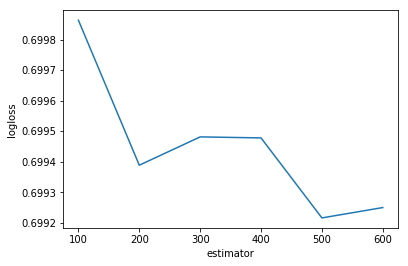

In [96]:
n_range = [100,200,300,400,500,600]
cv_scores= []
for n in n_range:
    tree = RandomForestClassifier(n_estimators = n, max_depth = 5, min_samples_leaf = 10)
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(-scores.mean())

plt.plot(n_range,cv_scores)
plt.xlabel('estimator')
plt.ylabel('logloss')
plt.show()

In [97]:
bestScore = min(cv_scores)
bestIndex = -1
for index in range(6):
    if cv_scores[index] == bestScore:
        bestIndex = n_range[index]
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 500


In [98]:
treeModel = RandomForestClassifier(n_estimators = 600, max_depth = 5, min_samples_leaf = 10)

In [99]:
treeModel.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
y_pred = treeModel.predict_proba(X)

log_loss(y,y_pred)

0.6965566871602866

In [101]:
predLable = treeModel.predict_proba(X_pred)

outputCSV(predLable)

Random Forest logloss: 0.70846

# More Feature

In [102]:
def date_to_month(d):
    d=pd.to_datetime(d)
    return d

date = np.vectorize(date_to_month)

t['dateTime'] = date(t['created'])
testing['dateTime'] = date(testing['created'])

t['year'] = t['dateTime'].dt.year
t['month'] = t['dateTime'].dt.month
t['day'] = t['dateTime'].dt.day
t['hour'] = t['dateTime'].dt.hour
t['minute'] = t['dateTime'].dt.minute

testing['year'] = testing['dateTime'].dt.year
testing['month'] = testing['dateTime'].dt.month
testing['day'] = testing['dateTime'].dt.day
testing['hour'] = testing['dateTime'].dt.hour
testing['minute'] = testing['dateTime'].dt.minute

featureSelect = featureSelect + ['year','month','day','hour','minute']

X_pred = testing[featureSelect]
X = t[featureSelect]
y = t['interest_level']

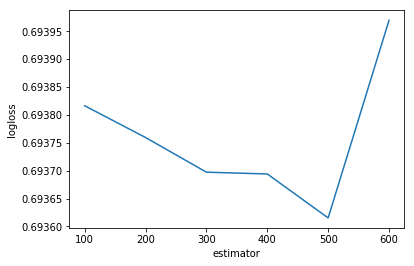

In [103]:
n_range = [100,200,300,400,500,600]
cv_scores= []
for n in n_range:
    tree = RandomForestClassifier(n_estimators = n, max_depth = 5, min_samples_leaf = 10)
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(-scores.mean())

plt.plot(n_range,cv_scores)
plt.xlabel('estimator')
plt.ylabel('logloss')
plt.show()

In [104]:
bestScore = min(cv_scores)
bestIndex = -1
for index in range(6):
    if cv_scores[index] == bestScore:
        bestIndex = n_range[index]
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 500


In [105]:
treeModel = RandomForestClassifier(n_estimators = 600, max_depth = 5, min_samples_leaf = 1)

scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'neg_log_loss')

-scores.mean()

0.6936413474955783

In [106]:
treeModel.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [107]:
y_pred = treeModel.predict_proba(X)
log_loss(y,y_pred)

0.6899587958124498

In [108]:
predLable = treeModel.predict_proba(X_pred)

outputCSV(predLable)

Random Forest logloss: 0.70422

# Add Unstructured data

In [109]:
def list2str(list):
    return " ".join([i.replace(' ', '_') for i in list]).encode('utf-8')

list2str = np.vectorize(list2str)

t['featuresStr'] = list2str(t['features'])
testing['featuresStr'] = list2str(testing['features'])

tf =  CountVectorizer(max_features=250, stop_words='english',max_df=0.6)
tr_sparse = tf.fit_transform(t["featuresStr"])
te_sparse = tf.transform(testing["featuresStr"])
X = sparse.hstack([t[featureSelect], tr_sparse])
X_pred = sparse.hstack([testing[featureSelect], te_sparse])

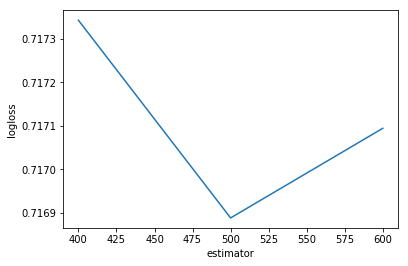

In [110]:
n_range = [400,500,600]
cv_scores= []
for n in n_range:
    tree = RandomForestClassifier(n_estimators = n, max_depth = 6, min_samples_leaf = 10)
    scores = cross_val_score(tree,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(-scores.mean())

plt.plot(n_range,cv_scores)
plt.xlabel('estimator')
plt.ylabel('logloss')
plt.show()

In [111]:
bestScore = min(cv_scores)
bestIndex = -1
for index in range(3):
    if cv_scores[index] == bestScore:
        bestIndex = n_range[index]
print('best parameter for decision tree is: %i'%bestIndex)

best parameter for decision tree is: 500


In [112]:

treeModel = RandomForestClassifier(n_estimators = 500, max_depth = 6, min_samples_leaf = 1)

scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'neg_log_loss')
-scores.mean()

0.7165610141450545

In [113]:
treeModel.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
y_pred = treeModel.predict_proba(X)
log_loss(y,y_pred)

0.7124536207324224

In [115]:
predLable = treeModel.predict_proba(X_pred)

outputCSV(predLable)

Random Forest logloss: 0.73263